# <center> Data Filtering

**Welcome to the fifth notebook in this series!**

In this notebook, we will explain data filtering. Data filtering is the process of removing unwanted data, or noise from the data set. For out particular data set, we will be filtering out frequencies that result from the environment, such as frequencies from typical movememt of the Campanile, tremors casued by the elevators running, etc. This is an important step in the data interpretation process becuase it allows us to have a clear look at a specific aspect of the data without having to look at the other aspects of the data that we are not interested in. 

Before we begin the process of data filtering, let's define a few important terms below. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Terminologies

** The order of the filter** : The degree of the approximating polynomial (increasing order increases roll-off and brings the filter closer to the ideal response).

** Cutoff frequency**: The frequency beyond which the filter will not pass a signal.

### Types of Data Filters

Remember that a filter removes unwanted frequencies so that certain frequencies can "pass" through and other frequencies can be reduced. There are many different types of data filters; we list a few of them below: 

##### Low-pass filter
<img src="Pictures/Low-pass.png" width=250> 

In a low-pass filter, higher frequencies past a certain cutoff frequency are attenuated and **lower frequencies pass through.** 

##### High-pass filter
<img src="Pictures/High-pass.png" width=250>

In a high-pass filter, lower frequencies past a certain cutoff frequency are attenuated and **higher frequencies pass through.** 

##### Band-pass filter
<img src="Pictures/Band-pass.png" width=250>

In a band-pass filter, frequencies in a certain range pass through, and frequencies outside this range are attenuated.

<br>
--
### Python Libraries

The Butterworth filter is a signal processing filter that keeps the frequency responses as flat as possible in the passband, which is the range of accepted frequencies. In other words, the Butterworth filter helps to create a smooth, ripple free, frequency response. This is useful for motions and audio analysis because it helps to limit distortion from outside environment. 

The Butterworth filter can be can be applied through the Scipy library. 

Read more about the documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html 

<br><br>![image info](Pictures/Butterworth_documentation.png)

<br>
--
### Intro to Filtering

Let's go over how to filter data using scipy, which you used in the previous notebook! The module within scipy that deals with filter is signal, so let's import it below.

In [ ]:
from scipy import signal

To successfully implement any of the filters mentioned above, we will need to make use of **signal.butter** and **signal.filtfilt**.

**Signal.butter** takes in the order of the filter, the cutoff frequency, and the type of filter. It then returns an array [numerator, denominator] representing the filter coefficients to be used in signal.filtfilt. 

The cutoff frequency is (frequency / Nyquist frequency), where the Nyquist frequency is half of the sampling frequency of our data. 

**Signal.filtfilt** takes in the two coefficients returned from signal.butter and applies a digital filter twice to the data given. The filter is applied twice in opposite directions (forwards and backwards) to succesffuly align our input data and the filtered data. 

This may be confusing after the first read, but as we go over more examples and get familiar with how to use data filters in our specific context, things wil hopefully become clearer! Let's now create a signal using a combination of sin and cos, plot it, and implement a lowpass filter before moving on to our dataset.

In [ ]:
# example from https://www.kite.com/python/answers/how-to-create-a-low-pass-filter-in-python
order = 5
sampling_freq = 30
nqf = sampling_freq / 2 # Nyquist frequency
frequency = 4
sampling_duration = 5
number_of_samples = sampling_freq * sampling_duration
cutoff_frequency = frequency / nqf

Above, we set some arbitrary values for numbers that we will use to create a **lowpass filter**. If we wanted, we could change the order of the filter, the sampling frequency, and the sampling duration with no difficulty. The sampling frequency is the number of samples collected over a certain period of time, usually a second. 

It is *not* particularly important to know exactly what the order of the filter is or how to find it, just as it is not necessary to know why the nyquist frequency is simply half of the sampling frequency. However, hopefully the names make sense and the bit of calculation needed is not too difficult.   

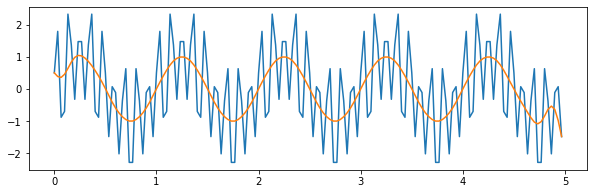

In [ ]:
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)
signalPlot = np.sin(2*np.pi*time) + 0.5*np.cos(6*2*np.pi*time) + 1.5*np.sin(9*2*np.pi*time)


# Look above to see what butter and filtfilt take in!
b, a = signal.butter(order, cutoff_frequency, "lowpass")
filtered_signal = signal.filtfilt(b, a, signalPlot)

f = plt.figure(figsize = (10, 3))
plt.plot(time, signalPlot)
plt.plot(time, filtered_signal)

The first two lines of the code above are not necessary to understand. Basically, np.linspace returns evenly spaced numbers over a specific interval, which we then used to create an oscillating graph in the second line. Once again, changing values produces a different graph!

Using the values we have collected and the information learned in the *Intro to Filtering* section, we can use *signal.butter* and *signal.filtfilt* to perform a low-pass filter. 

### Implementing a Filter

Let's take a look at implementing a low-pass filter on the NorthWest and SouthEast data subsets from 400 seconds to 407 seconds. Remember, a low-pass filter low frequencies pass through, while those past a certain point are reduced.

In [ ]:
# NORTH WEST DATA

#import data
nw_df_original = pd.read_csv('sather-tower-files/NorthWest.csv')

#take subset of data
nw_last_bell = nw_df_original.set_index('Sample No.')
nw_last_bell = nw_last_bell[(nw_last_bell['time[sec]'] >= 400) & (nw_last_bell['time[sec]'] < 407)]

#normalize data
nw_last_bell['Ax[mG]'] = nw_last_bell['Ax[mG]']-nw_last_bell['Ax[mG]'].iloc[0]
nw_last_bell['Ay[mG]'] = nw_last_bell['Ay[mG]']-nw_last_bell['Ay[mG]'].iloc[0]
nw_last_bell['Az[mG]'] = nw_last_bell['Az[mG]']-nw_last_bell['Az[mG]'].iloc[0]

#resetting axis 
nw_last_bell["Global X"] = nw_last_bell["Az[mG]"]
nw_last_bell["Global Y"] =  -1 * nw_last_bell["Ay[mG]"]
nw_last_bell["Global Z"] = nw_last_bell["Ax[mG]"]
nw_last_bell_clean = nw_last_bell[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

In [ ]:
# SOUTH EAST DATA

#import data
se_df_original = pd.read_csv('sather-tower-files/SouthEast.csv')

#take subset of data
se_last_bell = se_df_original.set_index('Sample No.')
se_last_bell = se_last_bell[(se_last_bell['time[sec]'] >= 400) & (se_last_bell['time[sec]'] < 407)]

#normalize data
se_last_bell['Ax[mG]'] = se_last_bell['Ax[mG]']-se_last_bell['Ax[mG]'].iloc[0]
se_last_bell['Ay[mG]'] = se_last_bell['Ay[mG]']-se_last_bell['Ay[mG]'].iloc[0]
se_last_bell['Az[mG]'] = se_last_bell['Az[mG]']-se_last_bell['Az[mG]'].iloc[0]

#resetting axis 
se_last_bell["Global X"] = se_last_bell["Az[mG]"]
se_last_bell["Global Y"] =  -1 * se_last_bell["Ay[mG]"]
se_last_bell["Global Z"] = se_last_bell["Ax[mG]"]
se_last_bell_clean = se_last_bell[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

In the Visualizations Notebook, you learned how to graph the data above and worked with it in great detail. You may have noticed much of the code to graph the data was repeated, so let's create a function to limit the number of lines of code we need to write. 

The function **graphData** takes in 3 parameters: the dataset (*NW, NE, SW, SE*), the yLabel(*Global X, Global Y, Global Z*), and the Title of the graph. Let's use this function to remember what the unfiltered data looks like. 

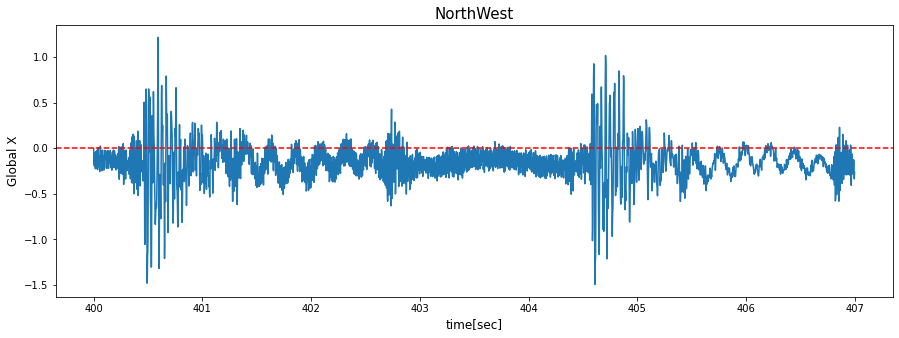

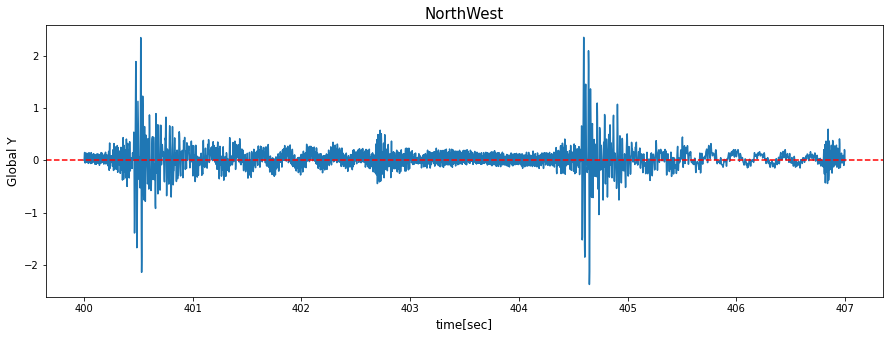

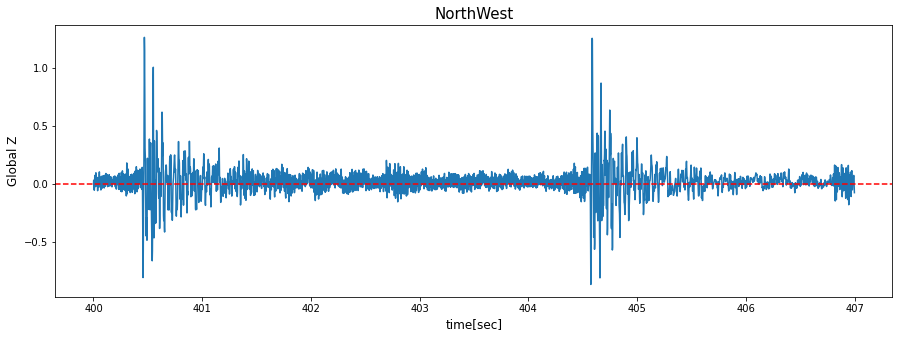

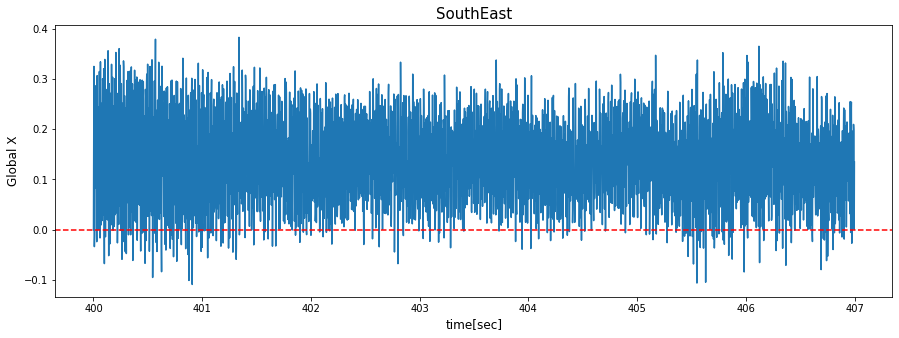

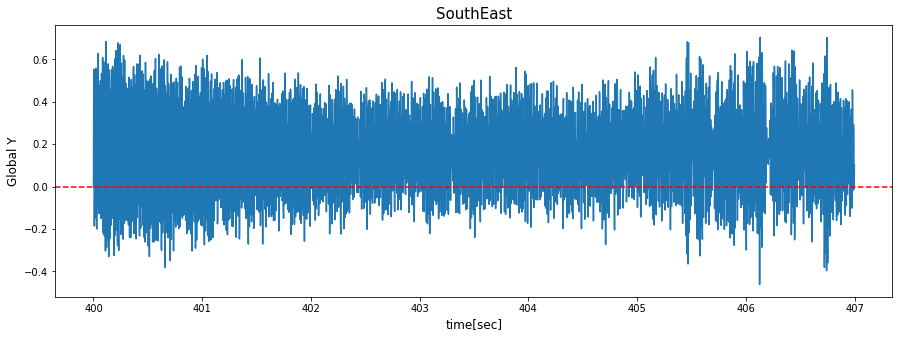

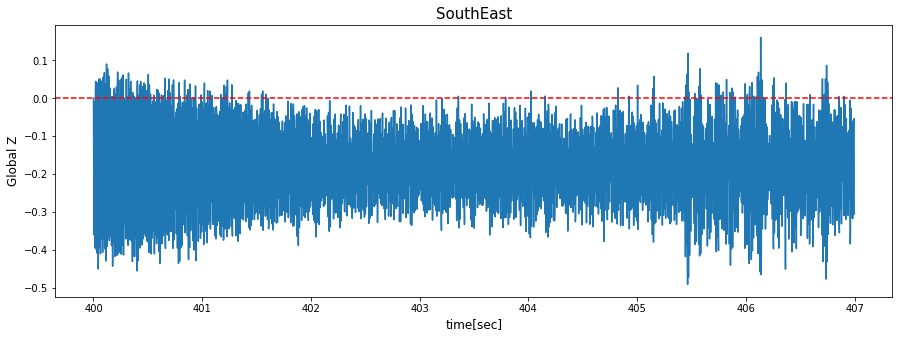

In [ ]:
def graphData(dataset, yLabel, Title):
    f = plt.figure(figsize = (15, 5))
    plt.plot(dataset["time[sec]"], dataset[yLabel])
    plt.axhline(y=0, color='r', linestyle='--')
    plt.ylabel(yLabel, fontsize = 12)
    plt.xlabel("time[sec]", fontsize = 12)
    plt.title(Title, fontsize =15)

graphData(nw_last_bell_clean, "Global X", "NorthWest")
graphData(nw_last_bell_clean, "Global Y", "NorthWest")
graphData(nw_last_bell_clean, "Global Z", "NorthWest")
graphData(se_last_bell_clean, "Global X", "SouthEast")
graphData(se_last_bell_clean, "Global Y", "SouthEast")
graphData(se_last_bell_clean, "Global Z", "SouthEast")

In [ ]:
nw_last_bell_clean.head()

,time[sec],Global X,Global Y,Global Z,ATotal[mG],Ts[deg.C]
Sample No.,,,,,,
200001,400.000,0.000000,-0.000000,0.000000,1002.889389,15.86426
200002,400.002,-0.049651,0.002682,0.032187,1002.924208,15.86426
200003,400.004,-0.158012,0.102401,0.005126,1002.909761,15.86426
200004,400.006,-0.191808,0.148296,-0.050187,1002.859587,15.86426
200005,400.008,-0.126422,0.063717,-0.054657,1002.845886,15.86426


We're ready to use a low-pass filter on our main dataset!

As you can see in the table above, there was a data point being collected every .002 seconds. Can you guess what the sampling frequency is? **Hint**: If we collected a data point every .5 seconds, the sampling frequency would be 2...What is 1 divided by 0.5?

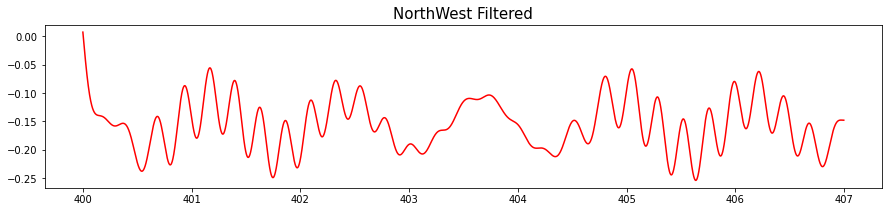

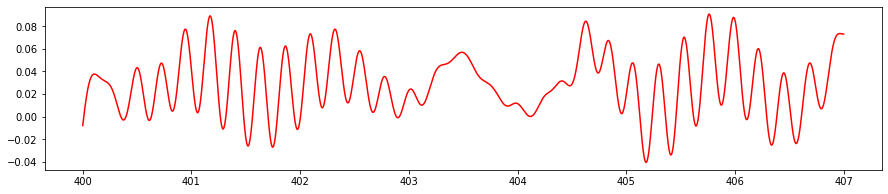

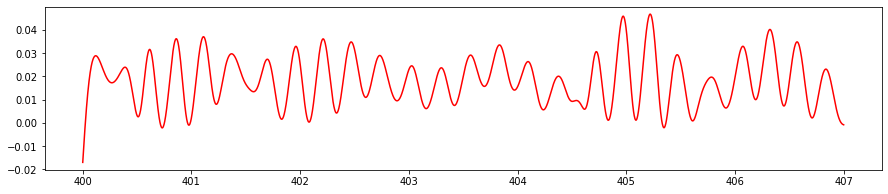

In [ ]:
sf = 500 # Sampling frequency
nqf = sf / 2 # Nyquist frequency (nqf = fs/2)
f = 4 
cutoff_frequency = f/(nqf)  
order = 3
b, a = signal.butter(3, cutoff_frequency, "lowpass")

filteredNorthWestX = signal.filtfilt(b, a, nw_last_bell_clean["Global X"])
f = plt.figure(figsize = (15, 3))
plt.plot(nw_last_bell_clean["time[sec]"].values, filteredNorthWestX, color = "red")
plt.title("NorthWest Filtered", fontsize =15)

filteredNorthWestY = signal.filtfilt(b, a, nw_last_bell_clean["Global Y"])
f = plt.figure(figsize = (15, 3))
plt.plot(nw_last_bell_clean["time[sec]"].values, filteredNorthWestY, color = "red")

filteredNorthWestZ = signal.filtfilt(b, a, nw_last_bell_clean["Global Z"])
f = plt.figure(figsize = (15, 3))
plt.plot(nw_last_bell_clean["time[sec]"].values, filteredNorthWestZ, color = "red")

Now that we have the filtered data, let's see what it looks like when layered over the original data!

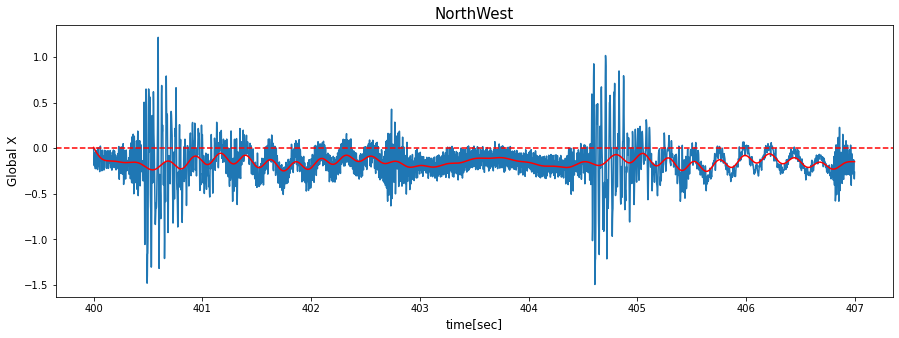

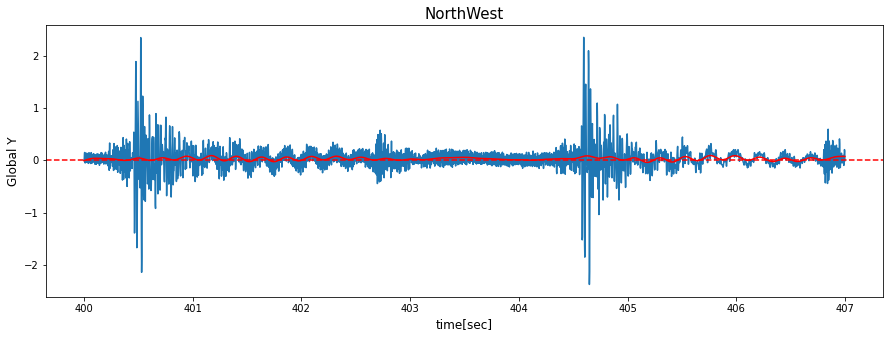

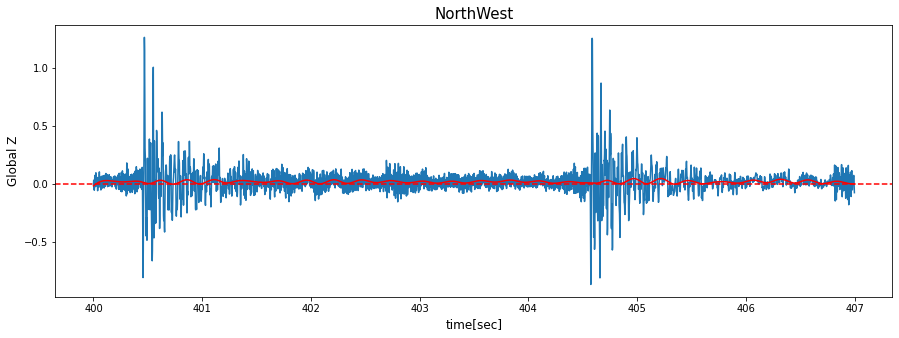

In [ ]:
graphData(nw_last_bell_clean, "Global X", "NorthWest")
plt.plot(nw_last_bell_clean["time[sec]"].values, filteredNorthWestX, color = "red")

graphData(nw_last_bell_clean, "Global Y", "NorthWest")
plt.plot(nw_last_bell_clean["time[sec]"].values, filteredNorthWestY, color = "red")

graphData(nw_last_bell_clean, "Global Z", "NorthWest")
plt.plot(nw_last_bell_clean["time[sec]"].values, filteredNorthWestZ, color = "red")

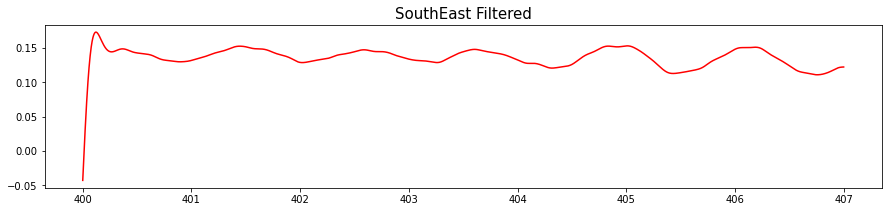

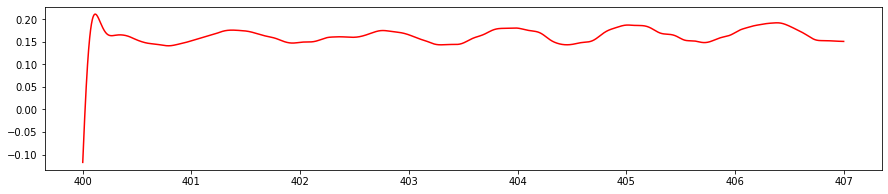

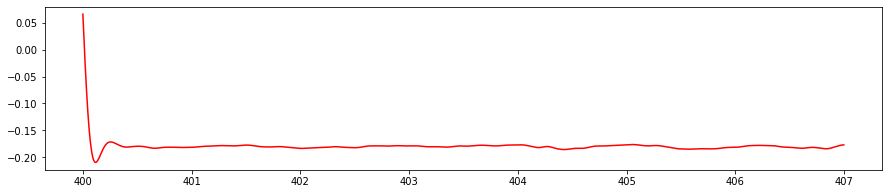

In [ ]:
sf = 500 # we collected a datapoint every .002 seconds, meaning every second we collected 500 samples
f = 4 
cutoff_frequency = f/(sf/2) # Nyquist frequency nqf = fs/2
order = 3
b, a = signal.butter(3, cutoff_frequency, "lowpass")

FilteredSouthEastX = signal.filtfilt(b, a, se_last_bell_clean["Global X"])
f = plt.figure(figsize = (15, 3))
plt.plot(se_last_bell_clean["time[sec]"].values, FilteredSouthEastX, color = "red")
plt.title("SouthEast Filtered", fontsize =15)

FilteredSouthEastY = signal.filtfilt(b, a, se_last_bell_clean["Global Y"])
f = plt.figure(figsize = (15, 3))
plt.plot(se_last_bell_clean["time[sec]"].values, FilteredSouthEastY, color = "red")

FilteredSouthEastZ = signal.filtfilt(b, a, se_last_bell_clean["Global Z"])
f = plt.figure(figsize = (15, 3))
plt.plot(se_last_bell_clean["time[sec]"].values, FilteredSouthEastZ, color = "red")

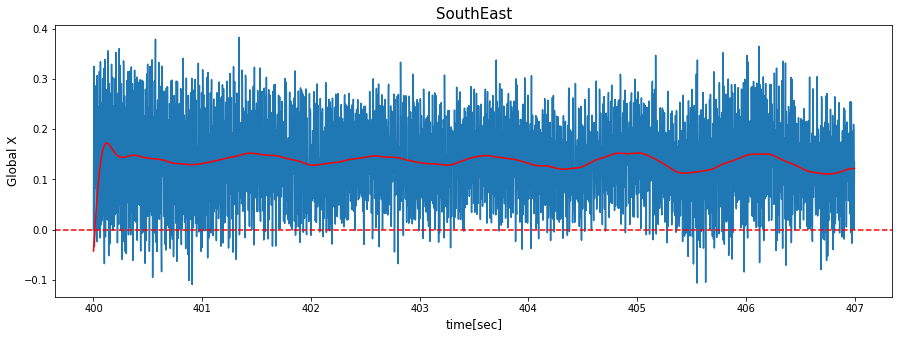

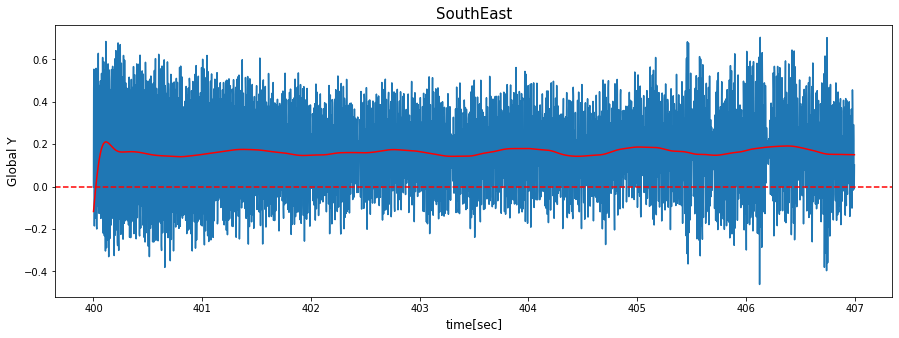

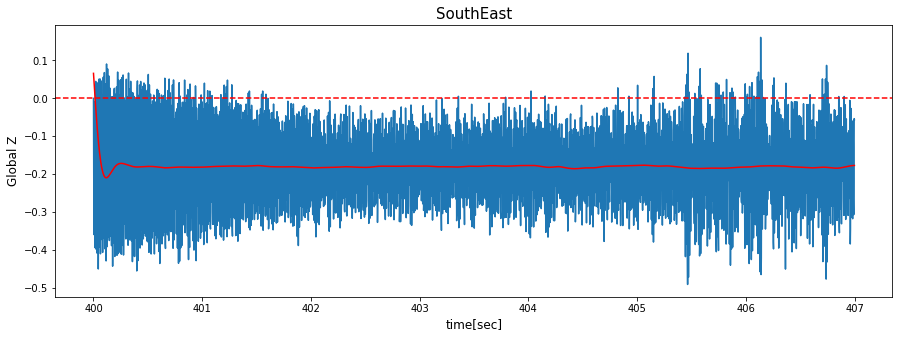

In [ ]:
graphData(se_last_bell_clean, "Global X", "SouthEast")
plt.plot(se_last_bell_clean["time[sec]"].values, FilteredSouthEastX, color = "red")

graphData(se_last_bell_clean, "Global Y", "SouthEast")
plt.plot(se_last_bell_clean["time[sec]"].values, FilteredSouthEastY, color = "red")

graphData(se_last_bell_clean, "Global Z", "SouthEast")
plt.plot(se_last_bell_clean["time[sec]"].values, FilteredSouthEastZ, color = "red")

- Implement a filter --> look at the Application section of Abdoul Aziz's Data Filtering Doc
https://docs.google.com/document/d/1RrvwE-i_ubnPHogp0_EeSfUP_KT5h9WpMg1oqwxWa-4/edit
   
    - low pass?

## Bibliography

Notebooks Developed By: Abdoul Aziz Sandotin, Arda Ulug, Karalyn Chong, Priscilla Zhang, Salvador Ramirez Jr.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ebd495-2227-475e-8d87-73e1af6a492b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>